In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [97]:
start = '2014-01-01'
end = date.today().strftime("%Y-%m-%d")
stock = 'MSFT'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [98]:
data.reset_index(inplace=True)

In [99]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,37.349998,37.400002,37.099998,37.160000,31.233059,30632200
1,2014-01-03,37.200001,37.220001,36.599998,36.910000,31.022932,31134800
2,2014-01-06,36.849998,36.889999,36.110001,36.130001,30.367344,43603700
3,2014-01-07,36.330002,36.490002,36.209999,36.410000,30.602690,35802800
4,2014-01-08,36.000000,36.139999,35.580002,35.759998,30.056364,59971700


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

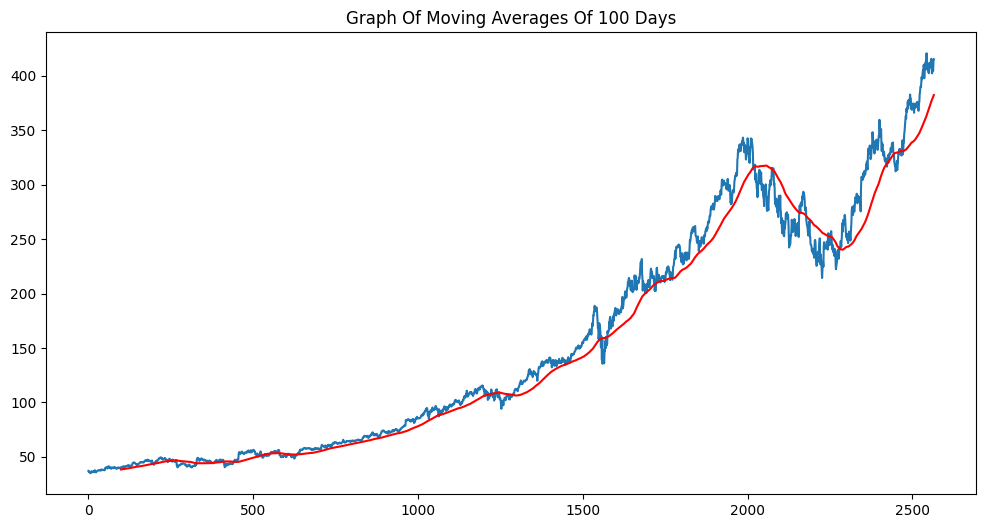

In [100]:
ma100 = data.Close.rolling(100).mean()
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

Text(0.5, 1.0, 'Comparison Of 100 Days And 200 Days Moving Averages')

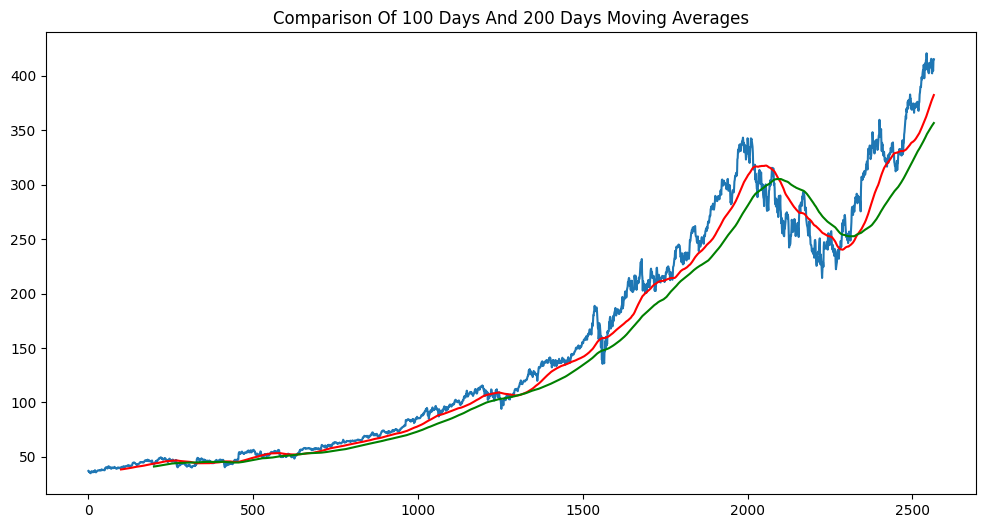

In [101]:
ma200 = data.Close.rolling(200).mean()
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparison Of 100 Days And 200 Days Moving Averages')

In [102]:
data.dropna(inplace=True)

In [103]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)

(1796, 7)


In [104]:
print(test.shape)

(770, 7)


In [105]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,37.349998,37.400002,37.099998,37.160000,31.233059,30632200
1,2014-01-03,37.200001,37.220001,36.599998,36.910000,31.022932,31134800
2,2014-01-06,36.849998,36.889999,36.110001,36.130001,30.367344,43603700
3,2014-01-07,36.330002,36.490002,36.209999,36.410000,30.602690,35802800
4,2014-01-08,36.000000,36.139999,35.580002,35.759998,30.056364,59971700


In [106]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1796,2021-02-22,237.419998,237.929993,232.399994,234.509995,228.480194,36446900
1797,2021-02-23,230.330002,234.830002,228.729996,233.270004,227.272079,30228700
1798,2021-02-24,230.009995,235.199997,229.000000,234.550003,228.519165,26339700
1799,2021-02-25,232.080002,234.589996,227.880005,228.990005,223.102127,39542200
1800,2021-02-26,231.529999,235.369995,229.539993,232.380005,226.404953,37819200


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [108]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [109]:
data_training_array = scaler.fit_transform(train_close)

In [110]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [111]:
x_train.shape

(1696, 100, 1)

In [112]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [113]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
          ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [115]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])

In [116]:
model.fit(x_train, y_train, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
53/53 [==============================] - 16s 234ms/step - loss: 0.0310 - MAE: 0.1187
Epoch 2/50
53/53 [==============================] - 12s 233ms/step - loss: 0.0085 - MAE: 0.0600
Epoch 3/50
53/53 [==============================] - 12s 232ms/step - loss: 0.0061 - MAE: 0.0493
Epoch 4/50
53/53 [==============================] - 12s 231ms/step - loss: 0.0062 - MAE: 0.0502
Epoch 5/50
53/53 [==============================] - 12s 233ms/step - loss: 0.0051 - MAE: 0.0458
Epoch 6/50
53/53 [==============================] - 12s 234ms/step - loss: 0.0048 - MAE: 0.0449
Epoch 7/50
53/53 [==============================] - 12s 233ms/step - loss: 0.0050 - MAE: 0.0453
Epoch 8/50
53/53 [==============================] - 12s 231ms/step - loss: 0.0041 - MAE: 0.0409
Epoch 9/50
53/53 [==============================] - 12s 232ms/step - loss: 0.0042 - MAE: 0.0409
Epoch 10/50
53/53 [==============================] - 12s 232ms/step - loss: 0.0036 - MAE: 0.0374
Epoch 11/50
53/53 [====================

In [117]:
past_100_days = pd.DataFrame(train_close[-100:])

In [118]:
test_df = pd.DataFrame(test_close)


In [119]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-119-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [120]:
final_df.head()

,0
0,209.440002
1,207.259995
2,210.330002
3,212.460007
4,206.190002


In [121]:
input_data = scaler.fit_transform(final_df)

In [122]:
input_data.shape

(870, 1)

In [123]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [124]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(770, 100, 1)
(770,)


In [125]:
y_pred = model.predict(x_test)

25/25 [==============================] - 3s 73ms/step


In [126]:
scale_factor = 1/scaler.scale_
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

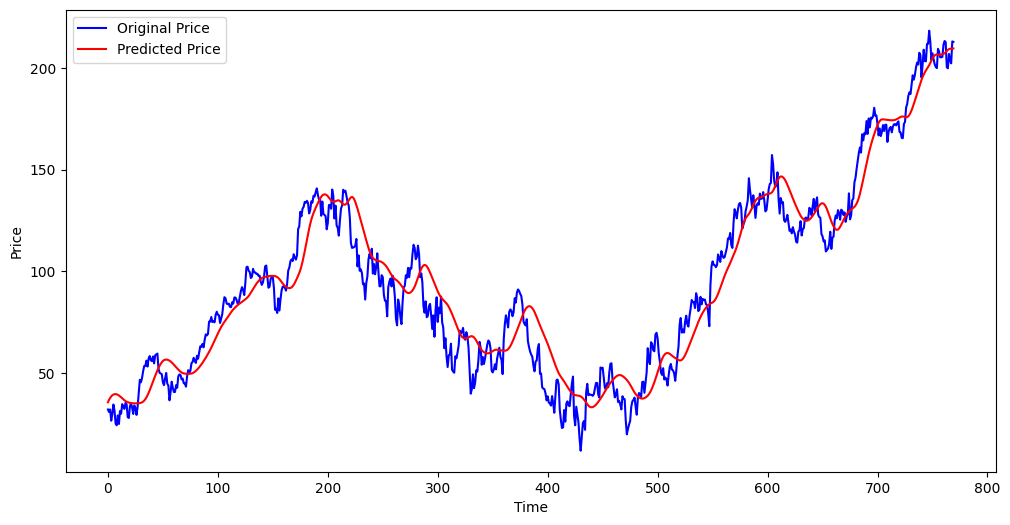

In [129]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [130]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.94%


In [131]:
from sklearn.metrics import r2_score
# Actual values
actual = y_test
# Predicted values
predicted = y_pred
# Calculate the R2 score
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.9293355317371423


In [ ]:
print(y_pred[-1])

[93.13312]


In [ ]:
model.save('Stock Prediction Model.keras')

In [ ]:
end_date = '2024-03-07'
num_days = 7

In [ ]:
print(end_date)

2024-03-07


In [ ]:
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=100)
data = yf.download(stock, start=start_date, end=end_date)
data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(len(data))

68


In [ ]:
if len(data) < 68:
        print("Insufficient data for prediction. Please provide more historical data.")

In [ ]:
data_scale = scaler.transform(data[['Close']])

In [ ]:
# Prepare data for prediction
x_pred = []
if data_scale.shape[0] == 68:
    x_pred.append(data_scale[0:68])  # Include the first 100 data points
    print("yes")
else:
    for i in range(68, data_scale.shape[0]):
        x_pred.append(data_scale[i-68:i])
x_pred = np.array(x_pred)


yes


In [ ]:
if x_pred.shape[0] == 0:
  print("No valid data points for prediction.")

In [ ]:
predicted_prices = []
latest_x = x_pred[-1]  # Get the latest sequence of 100 data points
for _ in range(num_days):
  y_pred_scaled = model.predict(np.array([latest_x]))  # Predict for one day ahead
  predicted_price = y_pred_scaled[0][0] * (1 / scaler.scale_)  # Inverse scale
  predicted_prices.append(predicted_price)

        # Update the latest_x with the new prediction
  latest_x = np.roll(latest_x, -1, axis=0)  # Shift the sequence by one step
  latest_x[-1] = y_pred_scaled[0]

1/1 [==============================] - 0s 54ms/step


In [ ]:
predicted_prices = np.array(predicted_prices)
print(predicted_prices)

[[60.76781187]
 [60.07293979]
 [59.54484518]
 [59.23068298]
 [59.11986374]
 [59.16984255]
 [59.32936475]]
